<a href="https://colab.research.google.com/github/EngRenan/Identifying-Prostate-Cancer/blob/main/Cancer_Prostata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identificando Cancer Prostata

In [ ]:
# Este projeto tem finalidade de ajudar na detecção de cancer de prostata utilizando meios de predição e estatística através do classificador multinomial Naïve Bayes

In [27]:
# Importando as libs necessárias

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Lendo a base de dados

Dados = pd.read_csv('Prostate_Cancer.csv', sep=',')
Dados.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [29]:
# Realizando a tradução das colunas para o melhor entendimento

Dados.rename(columns={
    'diagnosis_result' : 'Diagnóstico resultado',
    'radius' : 'Raio',
    'texture' : 'Textura',
    'perimeter' : 'Perimetro',
    'area' : 'Área',
    'smoothness' : 'Suavidade',
    'compactness' : 'Compacidade',
    'symmetry' : 'Simetria',
    'fractal_dimension' : 'Dimensão do fragmento'
    
}, inplace=True)

Dados.head()

,id,Diagnóstico resultado,Raio,Textura,Perimetro,Área,Suavidade,Compacidade,Simetria,Dimensão do fragmento
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [30]:
# Avaliando estatisticas dos datasets

Dados.describe()

,id,Raio,Textura,Perimetro,Área,Suavidade,Compacidade,Simetria,Dimensão do fragmento
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [31]:
# Ajustando a nomenclatura dos dados de algumas colunas 

Dados['Diagnóstico resultado'] = Dados['Diagnóstico resultado'].replace('M', 'Maligno')
Dados['Diagnóstico resultado'] = Dados['Diagnóstico resultado'].replace('B', 'Benigno')

# Retirando a coluna ID
Dados.drop(['id'], axis=1, inplace=True)

**Importante entender o comportamento da variável que estamos querendo prever **

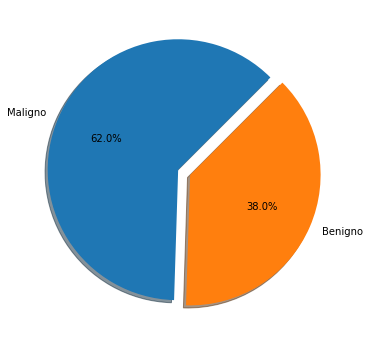

In [32]:
# Vamos plotar a dividão dos diganósticos

# Calculando os valores
Valores = Dados['Diagnóstico resultado'].value_counts()

# Filtrando os labels
Labels = [Valores.index.tolist()]

plt.figure( figsize=(8,6) )
plt.pie( Valores, #Valores dos graficos
        labels=Labels[0], #Labels laterais
        shadow=True, #Sombra nas pizzas
        explode=(0.0, 0.1), #Afastamento das pizzas
        startangle=45, #Ajuste do anglo
        autopct='%1.1f%%'); #Incluindo os valroes no grafico

In [33]:
# Ajustando a variável categórica para numérica

# Importando a função LabelEncoder
from sklearn import preprocessing

# Atribuindo a função 
Ajuste_variavel = preprocessing.LabelEncoder()

Dados['Diagnóstico resultado'] = Ajuste_variavel.fit_transform(Dados['Diagnóstico resultado'])

**Analisando Correlações**

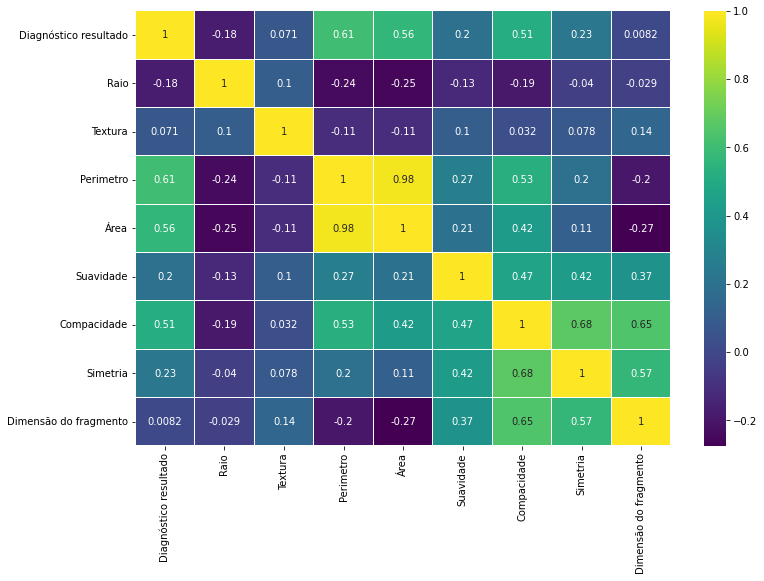

In [34]:
# Analisando as correlações em uma plotagem 

# Calculando a correlação entre os dados usando a lib Numpy
Correlacao = Dados.corr()

# Definindo Tamanho do Gráfico
plt.figure(figsize=(12,8))

# Fazendo o plot do gráfico
sns.heatmap(Correlacao, linewidths=.1, cmap='viridis', annot=True);

**Plotando todas as variáveis em um histograma**

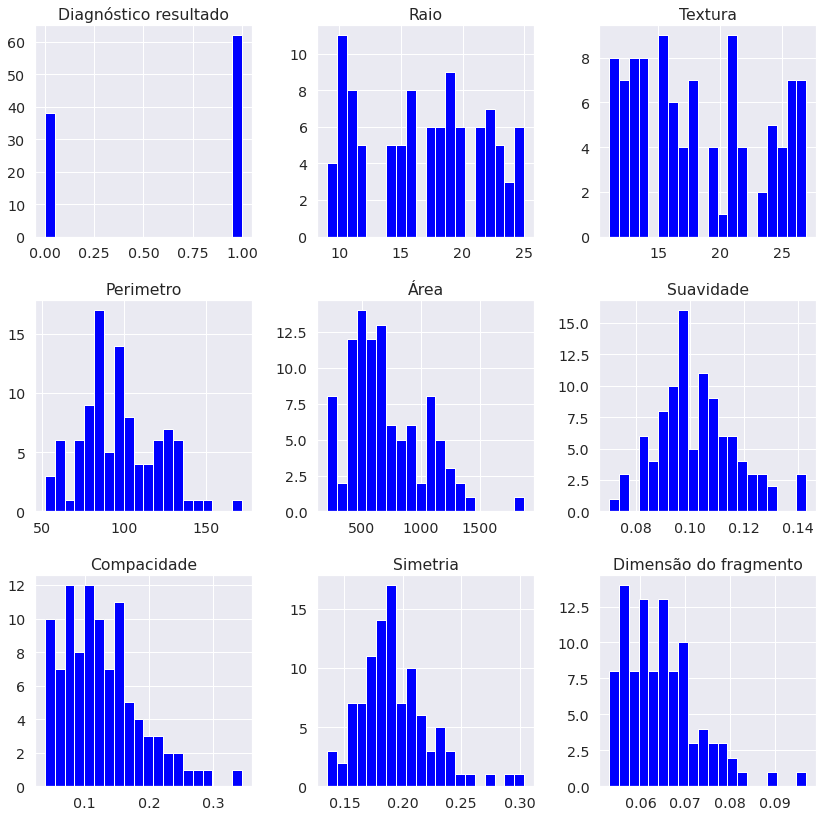

In [35]:
# Plotando todos os dados

# Definindo parametros de tamanho dos gráficos
sns.set(font_scale=1.3, rc={'figure.figsize':(14,14)} )

# Plotando todos gráficos como histograma 
# Ajustando cor e tamanho da barra 
ax = Dados.hist( bins=20, color='blue' )

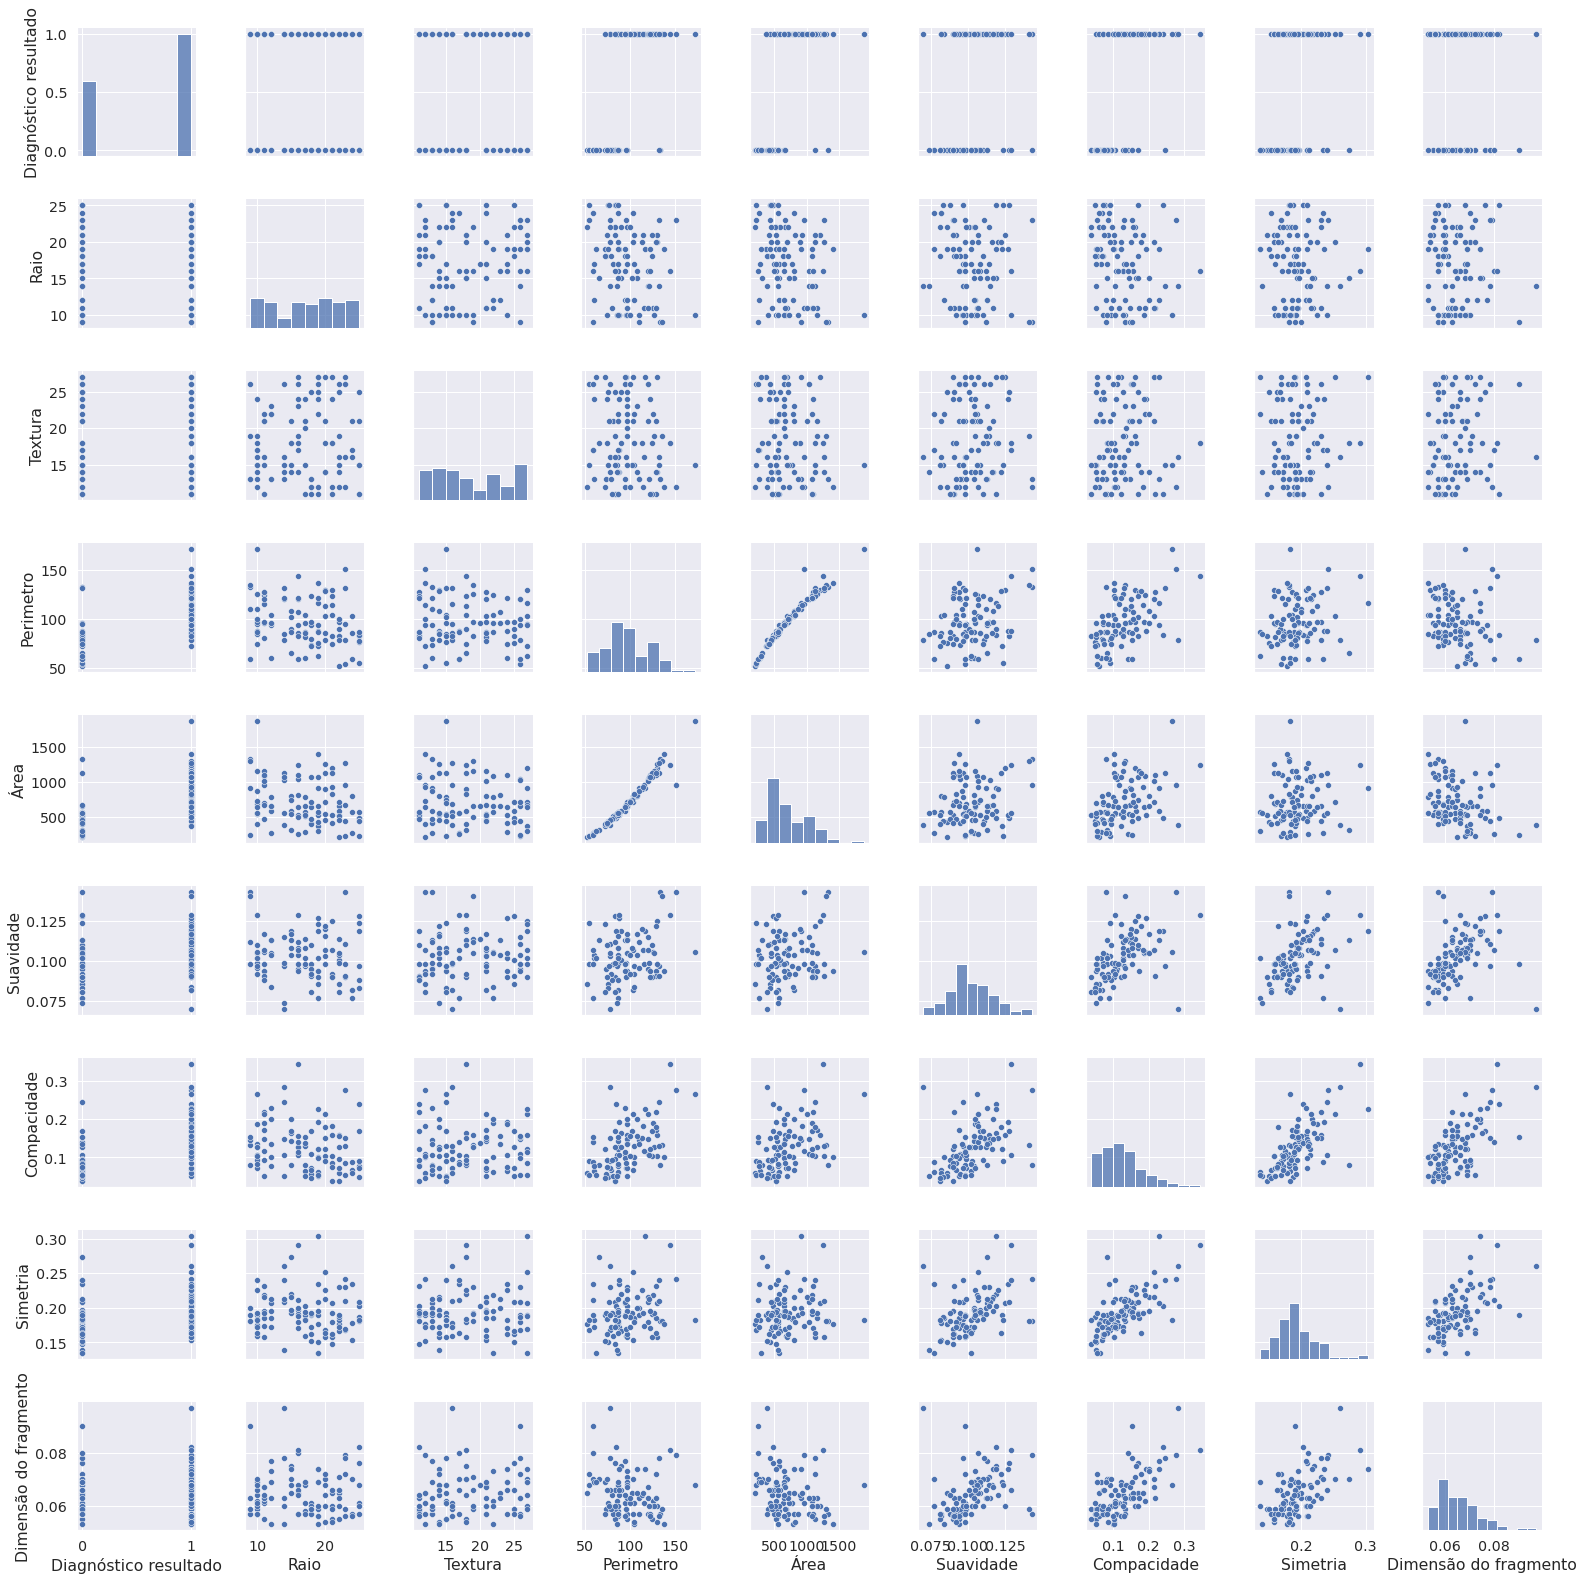

In [36]:
# Plot geral 
sns.pairplot(Dados);

**Separando os dados de treino e teste**

In [37]:
# Separando a base de dados
Caracteristica = Dados.iloc[:,1:].values
Previsor = Dados.iloc[:,0:1].values

# Importando a função para separar os dados de treino e teste 
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split( Caracteristica,
                                                        Previsor,
                                                        test_size=0.20,
                                                        random_state=10)

print('Dados de Treinamento:', len(x_treino) )
print('Dados de Teste:', len(x_teste) )

Dados de Treinamento: 80
Dados de Teste: 20


**Treinamento e Fit do Modelo**

In [38]:
# Treinamento do Modelo

# Função do Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Função do Naive Bayes
Funcao_NB = GaussianNB()

# Fitando o Modelo
Funcao_NB.fit(x_treino, y_treino)

# Calculando o scoore do modelo 
print('Score do Modelo:', Funcao_NB.score(x_treino, y_treino) )

Score do Modelo: 0.8125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Avaliação do Modelo**

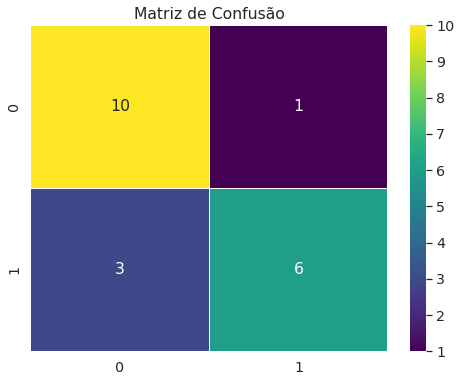

In [41]:
# Previsões 
Previsoes = Funcao_NB.predict(x_teste)

from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_teste, Previsoes)

# Definindo Tamanho do Gráfico 
plt.figure(figsize=(8,6))

# Fazendo o plot do gráfico 
sns.heatmap(Matriz, linewidths=.1, cmap='viridis', annot=True)
plt.title('Matriz de Confusão');

In [43]:
# Analisando o Report acima

from sklearn.metrics import classification_report
print( classification_report ( y_teste, Previsoes ) )

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



In [ ]:
# Este projeto foi idealizado e montado e disponibilizado pelo Odemir 